Report about usage statistics of UHH2 ntuples.

In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10, 6)

In [12]:
pd.options.display.max_colwidth = 200
pd.options.display.float_format = lambda x : "%.2f" % x

In [32]:
df = pd.read_csv("datasetinfo_full.csv", index_col=0, low_memory=False)

# cast certain columns as Categorical type to save space/time
df.loc[df['user'].str.match('karavdia'), 'user'] = 'akaravdi' # relabel anastasia's other username
df['user'] = df['user'].astype('category')
df['xmldir'] = df['xmldir'].astype('category')
df['year'] = df['year'].astype('category')
df['isdata'] = df['ntuple'].str.contains('DATA_')

# Try and figure out which dataset file come from:
df['dataset'] = np.nan
# this is the recommended way to set values based on value of another column
df.loc[df['ntuple'].str.contains('_JetHT'), 'dataset'] = 'JetHT'
df.loc[df['ntuple'].str.contains('_SingleMu'), 'dataset'] = 'SingleMu'
df.loc[df['ntuple'].str.contains('_EGamma'), 'dataset'] = 'EGamma'
df.loc[df['ntuple'].str.contains('_MET'), 'dataset'] = 'MET'
df.loc[df['ntuple'].str.contains('_SingleElectron'), 'dataset'] = 'SingleElectron'
df['dataset'] = df['dataset'].astype('category')

In [33]:
df.head()

,ntuple,size,user,xmldir,year,isdata,dataset
0,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,514.20,drberry,2018,2018,False,NaN
1,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,503.68,drberry,2018,2018,False,NaN
2,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,554.39,drberry,2018,2018,False,NaN
3,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.66,drberry,2018,2018,False,NaN
4,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.46,drberry,2018,2018,False,NaN


In [34]:
df.dtypes

ntuple       object
size        float64
user       category
xmldir     category
year       category
isdata         bool
dataset    category
dtype: object

In [35]:
total_size_mb = df['size'].sum()
MB_TO_TB = 1024*1024.

## General stats

In [47]:
print(len(df.index), "files")

192704 files


In [48]:
print("Total size of all ntuples: %.3f TB" % (total_size_mb / MB_TO_TB))
# NB be careful - don't access with df.size as calls internal size!

Total size of all ntuples: 54.245 TB


In [49]:
print('Average space used per user: %.3f TB' % (total_size_mb / (MB_TO_TB * df['user'].nunique())))

Average space used per user: 6.781 TB


In [50]:
print("Statistics for ntuple filesizes:")
df['size'].describe()

Statistics for ntuple filesizes:


count   192704.00
mean       295.17
std        224.62
min          0.37
25%        191.66
50%        245.85
75%        375.12
max       3808.24
Name: size, dtype: float64

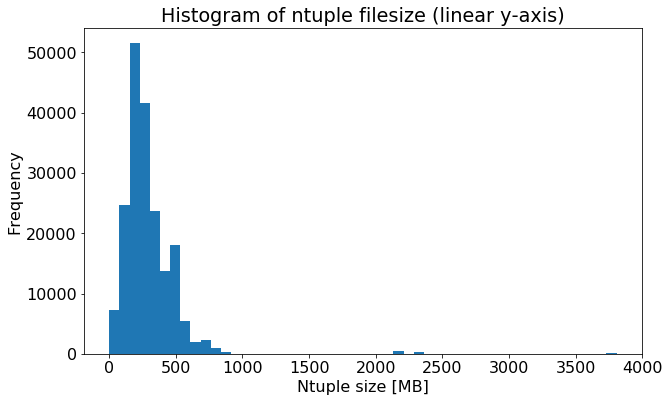

In [51]:
df['size'].plot(kind='hist', bins=50);
plt.xlabel('Ntuple size [MB]');
plt.title("Histogram of ntuple filesize (linear y-axis)");

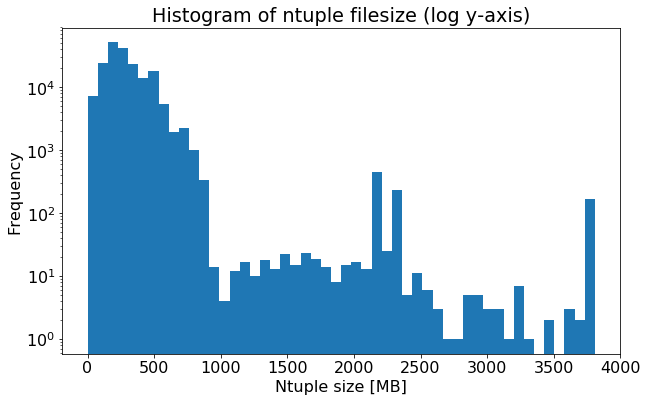

In [52]:
df['size'].plot(kind='hist', bins=50);
plt.xlabel('Ntuple size [MB]');
plt.yscale('log');
plt.title("Histogram of ntuple filesize (log y-axis)");

## Split by user

In [53]:
print(df['user'].nunique(), "unique users")

8 unique users


In [54]:
print("Total space usage per user [TB]:")
df.groupby('user')['size'].sum() / MB_TO_TB

Total space usage per user [TB]:


user
afroehli    0.74
akaravdi   36.08
deschwar    1.42
drberry     4.68
izoi        0.01
raggleto    6.62
rkogler     1.45
tiroy       3.24
Name: size, dtype: float64

In [55]:
print("% space usage by user:")
100 * df.groupby('user')['size'].sum() / total_size_mb

% space usage by user:


user
afroehli    1.37
akaravdi   66.51
deschwar    2.62
drberry     8.64
izoi        0.02
raggleto   12.20
rkogler     2.67
tiroy       5.97
Name: size, dtype: float64

In [56]:
print('# files per user:')
df.user.value_counts()

# files per user:


akaravdi    140999
drberry      17510
tiroy         9587
deschwar      8466
raggleto      8447
afroehli      5094
rkogler       2563
izoi            38
Name: user, dtype: int64

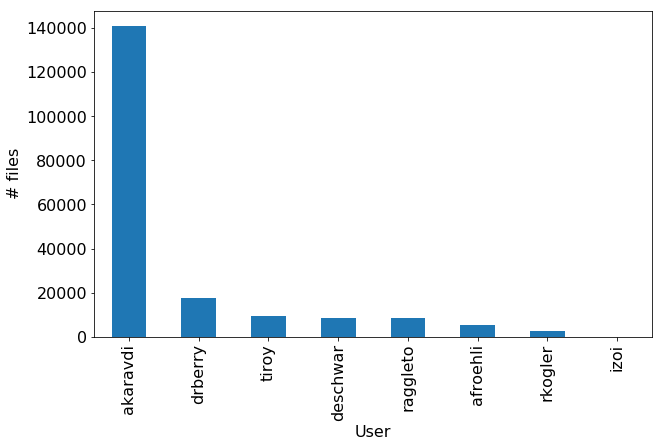

In [57]:
df.user.value_counts().plot(kind='bar');
plt.xlabel('User');
plt.ylabel('# files');

## Split by dataset year

In [58]:
print('Total space usage per dataset year [TB]:')
df.groupby('year')['size'].sum() / MB_TO_TB

Total space usage per dataset year [TB]:


year
2016v2    0.01
2016v3   12.86
2017      0.00
2018     41.37
Name: size, dtype: float64

In [59]:
print('% space usage per dataset year:')
100. * df.groupby('year')['size'].sum() / total_size_mb

% space usage per dataset year:


year
2016v2    0.02
2016v3   23.71
2017      0.01
2018     76.26
Name: size, dtype: float64

In [60]:
print("# files per dataset year:")
df['year'].value_counts()

# files per dataset year:


2018      165054
2016v3     27311
2017         198
2016v2       141
Name: year, dtype: int64

## Split by data/MC

In [61]:
print('Total space used per data/MC [TB]:')
df.groupby('isdata')['size'].sum() / MB_TO_TB

Total space used per data/MC [TB]:


isdata
False   38.35
True    15.90
Name: size, dtype: float64

In [62]:
print('Total space used per primary dataset [TB]:')
df[df['isdata']].groupby('dataset')['size'].sum() / MB_TO_TB

Total space used per primary dataset [TB]:


dataset
EGamma     4.79
JetHT      8.65
SingleMu   2.45
Name: size, dtype: float64